In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [65]:
# Configure path to data: 
with open('src/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Access the data paths
data_store = config['data']['original_data']

In [2]:
data = pd.read_csv('data/laptops.csv')

In [3]:
data['Final Price'].sort_values(ascending=False).head(5)

1099    7150.47
478     5999.00
1202    5758.14
1245    5630.90
1475    5368.77
Name: Final Price, dtype: float64

In [4]:
max(data[data['Brand'] == 'Dell']['Final Price'])

3936.0

In [5]:
# Assuming df is your DataFrame
# Step 1: Calculate the median value of the Screen column
median_before = data['Screen'].median()

# Step 2: Calculate the most frequent value (mode) of the Screen column
mode_value = data['Screen'].mode()[0]

# Step 3: Use the fillna method to fill the missing values in the Screen column with the most frequent value
data['Screen'].fillna(mode_value, inplace=True)

# Step 4: Calculate the median value of the Screen column again
median_after = data['Screen'].median()

# Step 5: Compare the median values before and after filling the missing values
if median_before == median_after:
    print("No")
else:
    print("Yes")

No


/var/folders/gd/z9gxvfjj6jz9l2838bq01n100000gp/T/ipykernel_5520/1408859892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Screen'].fillna(mode_value, inplace=True)


In [6]:
# Step 1: Select all the "Innjoo" laptops from the dataset
innjoo_laptops = data[data['Brand'] == 'Innjoo']

# Step 2: Select only columns RAM, Storage, Screen
selected_columns = innjoo_laptops[['RAM', 'Storage', 'Screen']]

# Step 3: Get the underlying NumPy array. Let's call it X
X = selected_columns.to_numpy()

# Step 4: Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX
XTX = X.T @ X

# Step 5: Compute the inverse of XTX
XTX_inv = np.linalg.inv(XTX)

# Step 6: Create an array y with values [1100, 1300, 800, 900, 1000, 1100]
y = np.array([1100, 1300, 800, 900, 1000, 1100])

# Step 7: Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w
w = XTX_inv @ X.T @ y

# Step 8: Compute the sum of all the elements of the result
sum_of_elements = np.sum(w)

print("Sum of all the elements of the result:", sum_of_elements)


Sum of all the elements of the result: 91.29988062995753


In [7]:
# customizing th column 
data.columns = data.columns.str.lower().str.replace(' ', '_')

<Axes: ylabel='Frequency'>

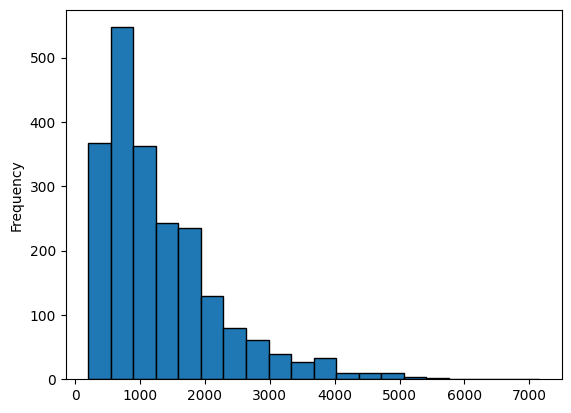

In [8]:
data['final_price'].plot(kind='hist', bins=20, edgecolor='black')

In [9]:
data['ram'].median()

np.float64(16.0)

In [10]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train:n_train+n_val]
df_test = data.iloc[n_train+n_val:]

In [12]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
df = data  # Replace with your actual dataset

# Shuffle the dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into train/val/test sets with 60%/20%/20% distribution
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


In [15]:
# simple linear regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = data  # Replace with your actual dataset

# Shuffle the dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into train/val/test sets with 60%/20%/20% distribution
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Function to preprocess the data
def preprocess_data(df):
    # Convert non-numeric columns to numeric if possible
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Preprocess the data
train_df = preprocess_data(train_df)
val_df = preprocess_data(val_df)
test_df = preprocess_data(test_df)

# Function to apply one-hot encoding and align columns
def one_hot_encode_and_align(train_df, val_df, test_df):
    # Combine all datasets to ensure all categories are included
    combined_df = pd.concat([train_df, val_df, test_df])
    combined_encoded_df = pd.get_dummies(combined_df, drop_first=True)

    # Split the combined encoded DataFrame back into train, val, and test
    train_encoded_df = combined_encoded_df.iloc[:len(train_df)]
    val_encoded_df = combined_encoded_df.iloc[len(train_df):len(train_df) + len(val_df)]
    test_encoded_df = combined_encoded_df.iloc[len(train_df) + len(val_df):]

    return train_encoded_df, val_encoded_df, test_encoded_df

# Apply one-hot encoding and align columns
train_df, val_df, test_df = one_hot_encode_and_align(train_df, val_df, test_df)

# Function to train and evaluate the model
def train_and_evaluate(train_df, val_df, fill_value):
    # Fill missing values
    train_df_filled = train_df.copy()
    val_df_filled = val_df.copy()
    train_df_filled.fillna(fill_value, inplace=True)
    val_df_filled.fillna(fill_value, inplace=True)

    # Prepare features and target
    X_train = train_df_filled.drop(columns=['final_price'])
    y_train = train_df_filled['final_price']
    X_val = val_df_filled.drop(columns=['final_price'])
    y_val = val_df_filled['final_price']

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return round(rmse, 2)

# Fill with 0
rmse_with_0 = train_and_evaluate(train_df, val_df, 0)

# Fill with mean of the training set
mean_screen = train_df['screen'].mean()
rmse_with_mean = train_and_evaluate(train_df, val_df, mean_screen)

# Compare RMSE
print(f"RMSE with 0: {rmse_with_0}")
print(f"RMSE with mean: {rmse_with_mean}")

# Determine which option gives better RMSE
if rmse_with_0 < rmse_with_mean:
    print("With 0")
elif rmse_with_mean < rmse_with_0:
    print("With mean")
else:
    print("Both are equally good")


RMSE with 0: 617.48
RMSE with mean: 617.48
Both are equally good


In [16]:
# using a regulization model:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = data  # Replace with your actual dataset

# Shuffle the dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into train/val/test sets with 60%/20%/20% distribution
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Function to preprocess the data
def preprocess_data(df):
    # Convert non-numeric columns to numeric if possible
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Preprocess the data
train_df = preprocess_data(train_df)
val_df = preprocess_data(val_df)
test_df = preprocess_data(test_df)

# Function to apply one-hot encoding and align columns
def one_hot_encode_and_align(train_df, val_df, test_df):
    # Combine all datasets to ensure all categories are included
    combined_df = pd.concat([train_df, val_df, test_df])
    combined_encoded_df = pd.get_dummies(combined_df, drop_first=True)

    # Split the combined encoded DataFrame back into train, val, and test
    train_encoded_df = combined_encoded_df.iloc[:len(train_df)]
    val_encoded_df = combined_encoded_df.iloc[len(train_df):len(train_df) + len(val_df)]
    test_encoded_df = combined_encoded_df.iloc[len(train_df) + len(val_df):]

    return train_encoded_df, val_encoded_df, test_encoded_df

# Apply one-hot encoding and align columns
train_df, val_df, test_df = one_hot_encode_and_align(train_df, val_df, test_df)

# Fill missing values with 0
train_df.fillna(0, inplace=True)
val_df.fillna(0, inplace=True)

# Prepare features and target
X_train = train_df.drop(columns=['final_price'])
y_train = train_df['final_price']
X_val = val_df.drop(columns=['final_price'])
y_val = val_df['final_price']

# List of regularization parameters to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_val, y_val, r):
    # Train the model
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return round(rmse, 2)

# Evaluate the model for each value of r
rmse_scores = {}
for r in r_values:
    rmse_scores[r] = train_and_evaluate(X_train, y_train, X_val, y_val, r)

# Print RMSE scores
for r, rmse in rmse_scores.items():
    print(f"RMSE with r={r}: {rmse}")

# Determine which r gives the best RMSE
best_r = min(rmse_scores, key=rmse_scores.get)
print(f"Best r: {best_r}")


RMSE with r=0: 624.64
RMSE with r=0.01: 617.48
RMSE with r=0.1: 617.48
RMSE with r=1: 617.48
RMSE with r=5: 617.49
RMSE with r=10: 617.5
RMSE with r=100: 617.66
Best r: 0.01


In [17]:
# TRYING DIFFERENT SEEDS TO SEE WHICH ONE GIVES THE BEST RMSE:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = data  # Replace with your actual dataset

# List of seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Function to preprocess the data
def preprocess_data(df):
    # Convert non-numeric columns to numeric if possible
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Function to apply one-hot encoding and align columns
def one_hot_encode_and_align(train_df, val_df, test_df):
    # Combine all datasets to ensure all categories are included
    combined_df = pd.concat([train_df, val_df, test_df])
    combined_encoded_df = pd.get_dummies(combined_df, drop_first=True)

    # Split the combined encoded DataFrame back into train, val, and test
    train_encoded_df = combined_encoded_df.iloc[:len(train_df)]
    val_encoded_df = combined_encoded_df.iloc[len(train_df):len(train_df) + len(val_df)]
    test_encoded_df = combined_encoded_df.iloc[len(train_df) + len(val_df):]

    return train_encoded_df, val_encoded_df, test_encoded_df

# Function to train and evaluate the model
def train_and_evaluate(train_df, val_df):
    # Fill missing values with 0
    train_df.fillna(0, inplace=True)
    val_df.fillna(0, inplace=True)

    # Prepare features and target
    X_train = train_df.drop(columns=['final_price'])
    y_train = train_df['final_price']
    X_val = val_df.drop(columns=['final_price'])
    y_val = val_df['final_price']

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return round(rmse, 2)

# Collect RMSE scores for each seed
rmse_scores = []

for seed in seed_values:
    # Shuffle the dataset with the current seed
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Split the dataset into train/val/test sets with 60%/20%/20% distribution
    train_val_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=seed)
    train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=seed)  # 0.25 * 0.8 = 0.2

    # Preprocess the data
    train_df = preprocess_data(train_df)
    val_df = preprocess_data(val_df)
    test_df = preprocess_data(test_df)

    # Apply one-hot encoding and align columns
    train_df, val_df, test_df = one_hot_encode_and_align(train_df, val_df, test_df)

    # Train and evaluate the model
    rmse = train_and_evaluate(train_df, val_df)
    rmse_scores.append(rmse)

# Compute the standard deviation of the RMSE scores
std_dev = np.std(rmse_scores)
std_dev_rounded = round(std_dev, 3)

# Print the standard deviation
print(f"Standard deviation of RMSE scores: {std_dev_rounded}")


Standard deviation of RMSE scores: 31.204


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = data  # Replace with your actual dataset

# Shuffle the dataset with seed 9
df = df.sample(frac=1, random_state=9).reset_index(drop=True)

# Split the dataset into train/val/test sets with 60%/20%/20% distribution
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=9)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=9)  # 0.25 * 0.8 = 0.2

# Combine train and validation datasets
combined_train_val_df = pd.concat([train_df, val_df])

# Function to preprocess the data
def preprocess_data(df):
    # Convert non-numeric columns to numeric if possible
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Preprocess the data
combined_train_val_df = preprocess_data(combined_train_val_df)
test_df = preprocess_data(test_df)

# Function to apply one-hot encoding and align columns
def one_hot_encode_and_align(train_df, test_df):
    # Combine all datasets to ensure all categories are included
    combined_df = pd.concat([train_df, test_df])
    combined_encoded_df = pd.get_dummies(combined_df, drop_first=True)

    # Split the combined encoded DataFrame back into train and test
    train_encoded_df = combined_encoded_df.iloc[:len(train_df)]
    test_encoded_df = combined_encoded_df.iloc[len(train_df):]

    return train_encoded_df, test_encoded_df

# Apply one-hot encoding and align columns
combined_train_val_df, test_df = one_hot_encode_and_align(combined_train_val_df, test_df)

# Fill missing values with 0
combined_train_val_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Prepare features and target
X_train_val = combined_train_val_df.drop(columns=['final_price'])
y_train_val = combined_train_val_df['final_price']
X_test = test_df.drop(columns=['final_price'])
y_test = test_df['final_price']

# Train the model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_val, y_train_val)

# Predict and evaluate on the test dataset
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rounded = round(rmse, 2)

# Print the RMSE on the test dataset
print(f"RMSE on the test dataset: {rmse_rounded}")

RMSE on the test dataset: 574.12


In [28]:
#### 
#Logistic regression model

bank_data = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [29]:
bank_data = bank_data[['age', 'job', 'marital', 'education','balance', 'housing','contact','day','month','duration','campaign', 'pdays', 'previous', 'poutcome', 'y']]

In [23]:
# missing values:
missing_values = bank_data.isnull().sum()
missing_values


age          0
job          0
marital      0
education    0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
# check most frequent value in the column education:
education_mode = bank_data['education'].mode()[0]
education_mode


'secondary'

In [31]:
# Print column names to verify
print(bank_data.columns)

# Check correlation between age and balance:
if 'age' in bank_data.columns and 'balance' in bank_data.columns:
    cor1 = bank_data['age'].corr(bank_data['balance'])
    print(f"Correlation between age and balance: {cor1}")
else:
    print("Column 'age' or 'balance' not found in the DataFrame.")

# Check correlation between day and campaign:
if 'day' in bank_data.columns and 'campaign' in bank_data.columns:
    cor2 = bank_data['day'].corr(bank_data['campaign'])
    print(f"Correlation between day and campaign: {cor2}")
else:
    print("Column 'day' or 'campaign' not found in the DataFrame.")

# Check correlation between day and pdays:
if 'day' in bank_data.columns and 'pdays' in bank_data.columns:
    cor3 = bank_data['day'].corr(bank_data['pdays'])
    print(f"Correlation between day and pdays: {cor3}")
else:
    print("Column 'day' or 'pdays' not found in the DataFrame.")

# Check correlation between pdays and previous:
if 'pdays' in bank_data.columns and 'previous' in bank_data.columns:
    cor4 = bank_data['pdays'].corr(bank_data['previous'])
    print(f"Correlation between pdays and previous: {cor4}")
else:
    print("Column 'pdays' or 'previous' not found in the DataFrame.")

# Determine which correlation is the highest:
correlations = {
    'age-balance': cor1 if 'age' in bank_data.columns and 'balance' in bank_data.columns else None,
    'day-campaign': cor2 if 'day' in bank_data.columns and 'campaign' in bank_data.columns else None,
    'day-pdays': cor3 if 'day' in bank_data.columns and 'pdays' in bank_data.columns else None,
    'pdays-previous': cor4 if 'pdays' in bank_data.columns and 'previous' in bank_data.columns else None
}

# Filter out None values before finding the max
correlations = {k: v for k, v in correlations.items() if v is not None}

if correlations:
    max_corr = max(correlations, key=correlations.get)
    print(f"The highest correlation is between {max_corr} with a value of {correlations[max_corr]}")
else:
    print("No valid correlations found.")


Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')
Correlation between age and balance: 0.09778273937134745
Correlation between day and campaign: 0.1624902163261929
Correlation between day and pdays: -0.09304407377294062
Correlation between pdays and previous: 0.45481963548050136
The highest correlation is between pdays-previous with a value of 0.45481963548050136


In [32]:
# encoding the y variable:
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})

In [35]:
from sklearn.model_selection import train_test_split

bank_data_full_train, bank_data_test = train_test_split(bank_data, test_size=0.2, random_state=42)
bank_data_train, bank_data_val = train_test_split(bank_data_full_train, test_size=0.2, random_state=42)

In [36]:
len(bank_data_train), len(bank_data_val), len(bank_data_test)

(28934, 7234, 9043)

In [37]:
df_train = bank_data_train.reset_index(drop=True)
df_val = bank_data_val.reset_index(drop=True)
df_test = bank_data_test.reset_index(drop=True)

In [38]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [39]:
from sklearn.metrics import mutual_info_score
def mutual_info_churn_score(series):
    return mutual_info_score(series, bank_data_full_train.y)

In [46]:
categorical = [
    'job',
    'marital',
    'education',
    'housing',
    'contact',
    'month',
    'poutcome'
]

numerical = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous'
]

In [44]:
mi = bank_data_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.029257
month        0.024774
contact      0.014164
housing      0.009800
job          0.007765
education    0.002458
marital      0.002019
dtype: float64

In [47]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [53]:
# Assuming y_val is the target variable for the validation dataset
accuracy = model.score(X_val, y_val)

# Round the accuracy to 2 decimal digits
accuracy_rounded = round(accuracy, 2)

print(f"Accuracy on the validation dataset: {accuracy_rounded}")


Accuracy on the validation dataset: 0.9


In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Train a model with all features and record the accuracy
model_all_features = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_all_features.fit(X_train, y_train)
original_accuracy = model_all_features.score(X_val, y_val)

# Initialize variables to store the results
accuracy_differences = {}

# Exclude each original feature one by one and train a model without it
for feature in categorical + numerical:
    # Create a copy of the training and validation data without the current feature
    train_dict_reduced = df_train.drop(columns=[feature]).to_dict(orient='records')
    val_dict_reduced = df_val.drop(columns=[feature]).to_dict(orient='records')

    X_train_reduced = dv.fit_transform(train_dict_reduced)
    X_val_reduced = dv.transform(val_dict_reduced)

    # Train a model without the current feature
    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)

    # Calculate the accuracy without the current feature
    accuracy_reduced = model_reduced.score(X_val_reduced, y_val)

    # Calculate the difference in accuracy
    accuracy_difference = original_accuracy - accuracy_reduced
    accuracy_differences[feature] = accuracy_difference

# Find the feature with the smallest difference
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)

print(f"The least useful feature is: {least_useful_feature}")
print(f"Difference in accuracy without this feature: {accuracy_differences[least_useful_feature]:.2f}")


The least useful feature is: contact
Difference in accuracy without this feature: -0.00


In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Train a model with all features and record the accuracy
model_all_features = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_all_features.fit(X_train, y_train)
original_accuracy = model_all_features.score(X_val, y_val)

# Initialize variables to store the results
features_to_test = ['age', 'balance', 'marital', 'previous']
accuracy_differences = {}

# Exclude each specified feature one by one and train a model without it
for feature in features_to_test:
    # Create a copy of the training and validation data without the current feature
    train_dict_reduced = df_train.drop(columns=[feature]).to_dict(orient='records')
    val_dict_reduced = df_val.drop(columns=[feature]).to_dict(orient='records')

    X_train_reduced = dv.fit_transform(train_dict_reduced)
    X_val_reduced = dv.transform(val_dict_reduced)

    # Train a model without the current feature
    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)

    # Calculate the accuracy without the current feature
    accuracy_reduced = model_reduced.score(X_val_reduced, y_val)

    # Calculate the difference in accuracy
    accuracy_difference = original_accuracy - accuracy_reduced
    accuracy_differences[feature] = accuracy_difference

# Find the feature with the smallest difference
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)

print(f"The least useful feature is: {least_useful_feature}")
print(f"Difference in accuracy without this feature: {accuracy_differences[least_useful_feature]:.2f}")


The least useful feature is: marital
Difference in accuracy without this feature: -0.00


In [59]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Train a model with all features and record the accuracy
model_all_features = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_all_features.fit(X_train, y_train)
original_accuracy = model_all_features.score(X_val, y_val)

# Initialize variables to store the results
features_to_test = ['age', 'balance', 'marital', 'previous']
accuracy_differences = {}

# Exclude each specified feature one by one and train a model without it
for feature in features_to_test:
    # Create a copy of the training and validation data without the current feature
    train_dict_reduced = df_train.drop(columns=[feature]).to_dict(orient='records')
    val_dict_reduced = df_val.drop(columns=[feature]).to_dict(orient='records')

    # Fit the DictVectorizer on the reduced training data
    dv_reduced = DictVectorizer(sparse=False)
    X_train_reduced = dv_reduced.fit_transform(train_dict_reduced)
    X_val_reduced = dv_reduced.transform(val_dict_reduced)

    # Train a model without the current feature
    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)

    # Calculate the accuracy without the current feature
    accuracy_reduced = model_reduced.score(X_val_reduced, y_val)

    # Calculate the difference in accuracy
    accuracy_difference = original_accuracy - accuracy_reduced
    accuracy_differences[feature] = accuracy_difference

# Find the feature with the smallest difference
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)

print(f"The least useful feature is: {least_useful_feature}")
print(f"Difference in accuracy without this feature: {accuracy_differences[least_useful_feature]:.2f}")


The least useful feature is: marital
Difference in accuracy without this feature: -0.00


In [60]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Define the values of C to try
C_values = [0.01, 0.1, 1, 10, 100]

# Initialize a dictionary to store the accuracies for each C
accuracies = {}

# Train models with different values of C and record the accuracy
for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    accuracies[C] = round(accuracy, 3)

# Find the value of C that leads to the best accuracy
best_C = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_C]

print(f"The value of C that leads to the best accuracy on the validation set is: {best_C}")
print(f"Best accuracy: {best_accuracy}")


The value of C that leads to the best accuracy on the validation set is: 0.1
Best accuracy: 0.901


In [1]:
import pickle

# Load the Dictionary Vectorizer and model from files
with open('src/models/dv.bin', 'rb') as f_dv:
    dv = pickle.load(f_dv)

with open('src/models/model1.bin', 'rb') as f_model:
    model = pickle.load(f_model)

# Client data
client = {"job": "management", "duration": 400, "poutcome": "success"}

# Transform the client data using the Dictionary Vectorizer
X = dv.transform([client])

# Get the prediction probability
probability = model.predict_proba(X)[0][1]
print(f'Probability of subscription: {probability:.3f}')

Probability of subscription: 0.759


In [6]:
import requests

# Define the URL (assuming local server)
url = "http://localhost:9696/predict"

# Define the client data
client = {
    "job": "student",
    "duration": 280,
    "poutcome": "failure"
}

# Make the request
response = requests.post(url, json=client)

# Look at the response
print(response.status_code)  # Should be 200 if successful
print(response.json())  # Should show the probability

200
{'subscription_probability': 0.33480703475511053}


In [10]:
import requests

url = "http://localhost:9696/predict"
client = {"job": "management", "duration": 400, "poutcome": "success"}
response = requests.post(url, json=client).json()

print(f"The probability that this client will get a subscription is: {response['subscription_probability']:.3f}")

ConnectionError: HTTPConnectionPool(host='localhost', port=9696): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x123646300>: Failed to establish a new connection: [Errno 61] Connection refused'))